# Capstone Project : Clasification Problem

**Overview**: The objective of the project is to develop a classification model that predicts which bank customers are likely to close their accounts. Additionally, the study aims to identify and analyze the key factors contributing to customer attrition.  



### Getting Started

I have sourced the data from Kaggle which they conducted as part of the playground series couple of years ago. (https://www.kaggle.com/competitions/playground-series-s4e1/data).



### Step 1: Understanding the Data

To gain a better understanding of the data, Analysing the data and performing EDA.

In [1]:
# Problem stattemnet
#Task is to predict whether a customer continues with their account or closes it (e.g., churns)


### Step 2: Read in the Data

Use pandas to read in the dataset `train.csv`.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('data/train.csv', sep = ',')

In [5]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


### Step 3: Understanding the Features & Analysing


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object
 5   Gender           165034 non-null  object
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64


Output variable (desired target):
 13  Exited           165034 non-null  int64
```



In [6]:
df.nunique()

,0
id,165034
CustomerId,23221
Surname,2797
CreditScore,457
Geography,3
Gender,2
Age,71
Tenure,11
Balance,30075
NumOfProducts,4


In [7]:
df['Geography'].unique()
#df['CreditScore'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'Count of Null')

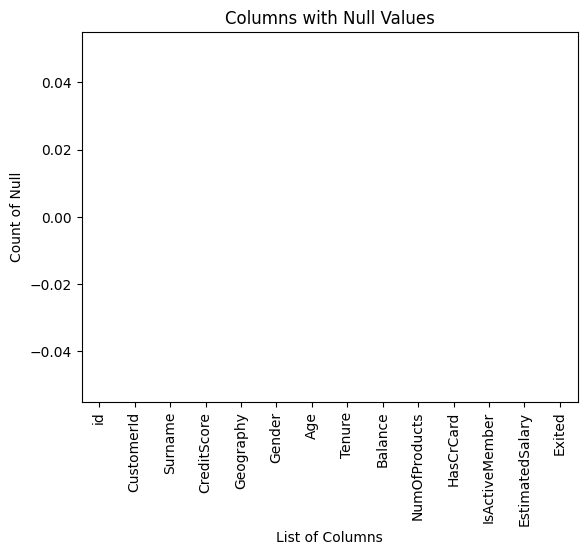

In [9]:
# Null values
#Graphical representation of null values
df.isnull().sum().sort_values().plot(kind = 'bar')
plt.title('Columns with Null Values')
plt.xlabel('List of Columns')
plt.ylabel('Count of Null')

In [10]:
df.describe([0.25,0.50,0.75, 0.85,0.90]).T # Numeric summary


,count,mean,std,min,25%,50%,75%,85%,90%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,1.402780e+05,148529.70,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,1.577819e+07,15790678.00,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,7.350000e+02,754.00,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,4.600000e+01,50.00,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,8.000000e+00,9.00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,1.320887e+05,139959.05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,2.000000e+00,2.00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.000000e+00,1.00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.000000e+00,1.00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,1.708296e+05,176843.53,199992.48


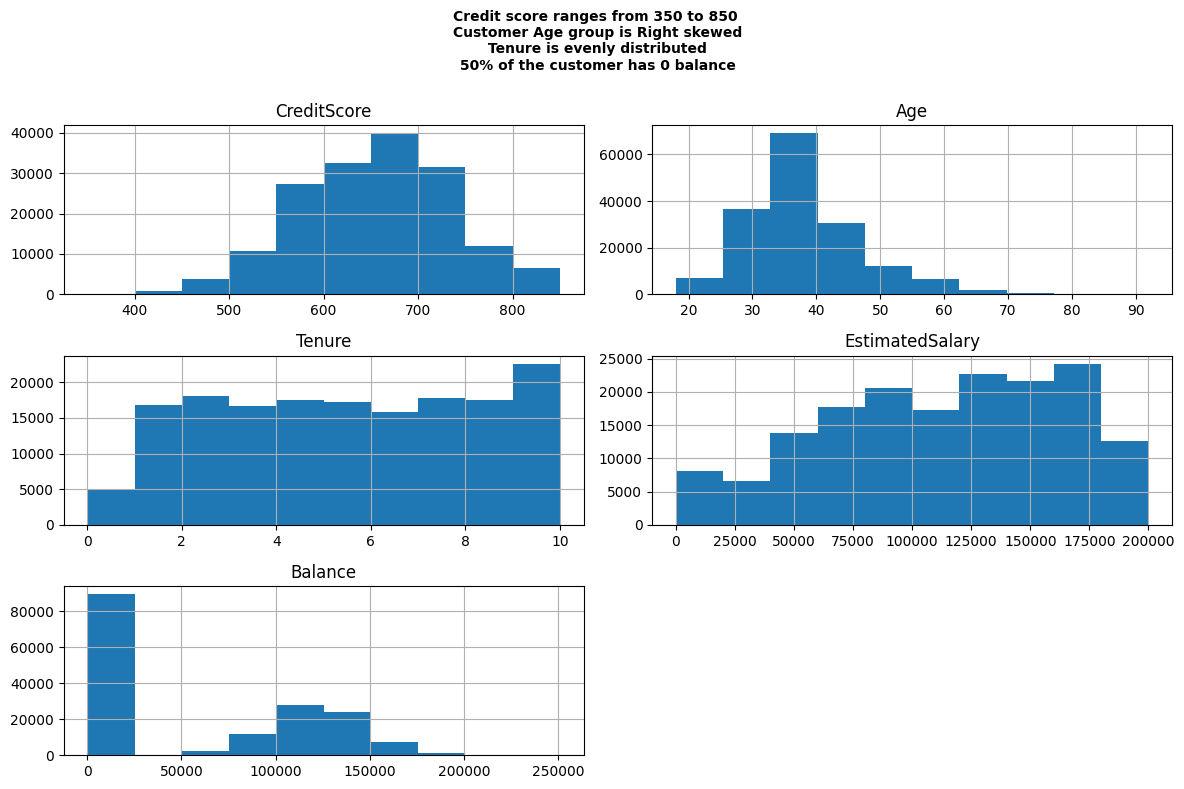

In [11]:
#Main Numerical Columns Histogram only few columns
num_cols = ['CreditScore', 'Age','Tenure', 'EstimatedSalary', 'Balance']
df[num_cols].hist(figsize = (12,8))
plt.suptitle("""Credit score ranges from 350 to 850
 Customer Age group is Right skewed
 Tenure is evenly distributed
 50% of the customer has 0 balance
  """, fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


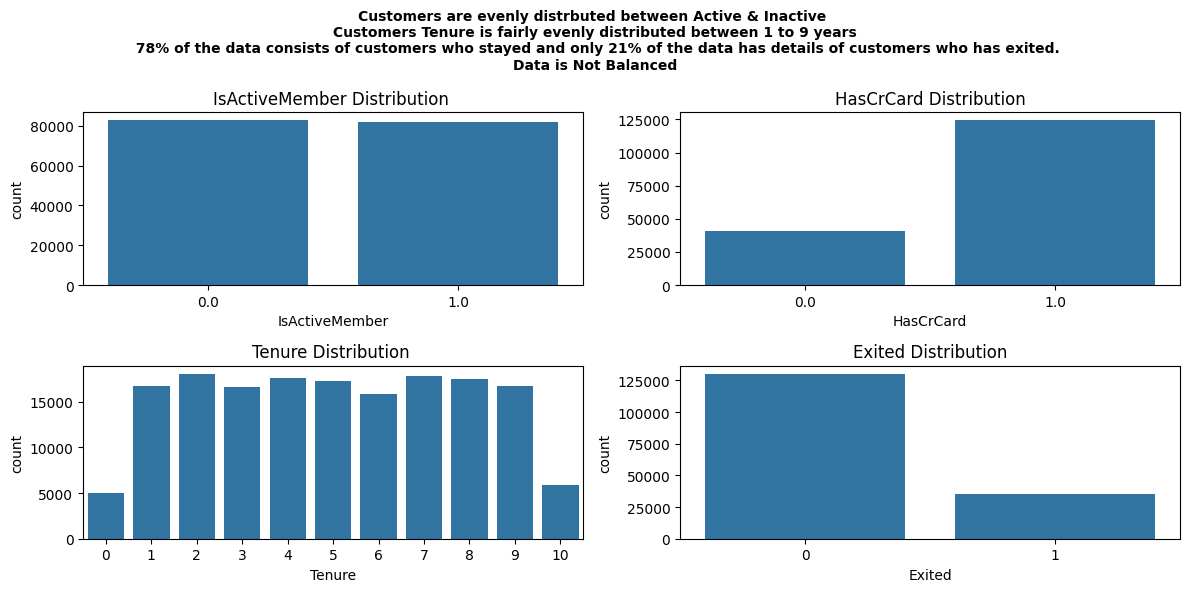

In [12]:
plt.figure(figsize=(12, 6))

plt.subplot(2,2,1)
plt.title('IsActiveMember Distribution ')
sns.countplot(x='IsActiveMember', data=df)

plt.subplot(2,2,2)
plt.title('HasCrCard Distribution')
sns.countplot(x='HasCrCard', data=df)

plt.subplot(2,2,3)
plt.title('Tenure Distribution ')
sns.countplot(x='Tenure', data=df)

plt.subplot(2,2,4)
plt.title('Exited Distribution')
sns.countplot(x='Exited', data=df)

plt.suptitle("Customers are evenly distrbuted between Active & Inactive \n Customers Tenure is fairly evenly distributed between 1 to 9 years \n 78% of the data consists of customers who stayed and only 21% of the data has details of customers who has exited.\nData is Not Balanced", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


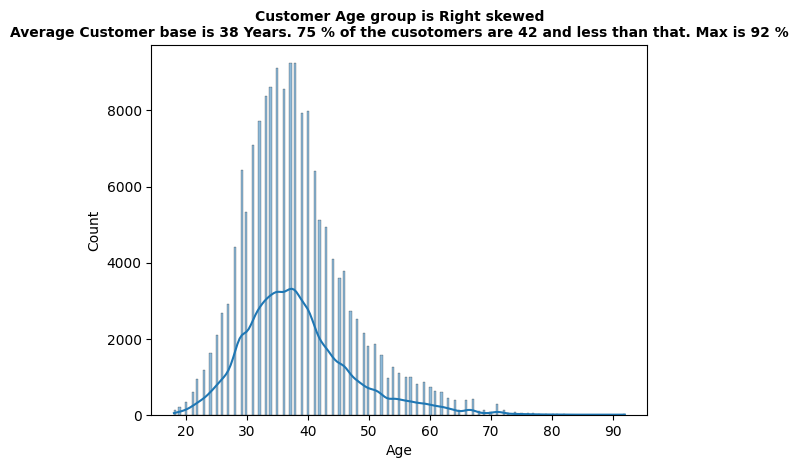

In [13]:
sns.histplot(x='Age', data=df, kde=True)     # Age distribution
plt.title("""Customer Age group is Right skewed
Average Customer base is 38 Years. 75 % of the cusotomers are 42 and less than that. Max is 92 %""", fontsize=10, fontweight='bold')
plt.show()

In [14]:
# Based on the above Data and below are the observations
#1. CreditScore ranges from 350 to 850. More than 75% of the customers score is 710 and less. 50% of the cusomer score is less than 660. ##### which is Normal
#2. Age -- Average Customer base is 38 Years. 75 % of the cusotomers are 42 and less than that. Max is 92 % . it is Right skewed
#3. Tenure -- 50% of the customer stays for 5 Years- Mean is 5 Years. Also more than 75% of the customer has tenure of 7 years or less. Max is 10.
    # Tenure is fairly evenly distributed between 1 to 9 years.
#4. EstimatedSalary -- 50% of the customer hold a salary of 117K . Average - 112K- Max of 200K. 75% of the cusomers salary is 155K . which is right skewed.
#5. Balance -- Max is 250K. But 50% of the customer has 0 balance.
#6. NumOfProducts - 75% of the customers have 2 products.
#7 Customers are almost evenly split between inactive and active members.


<Axes: title={'center': ' 78% of the data consists of customers who stayed and only 21% of the data has details of customers who has exited.\nData is Not Balanced'}, xlabel='Exited', ylabel='count'>

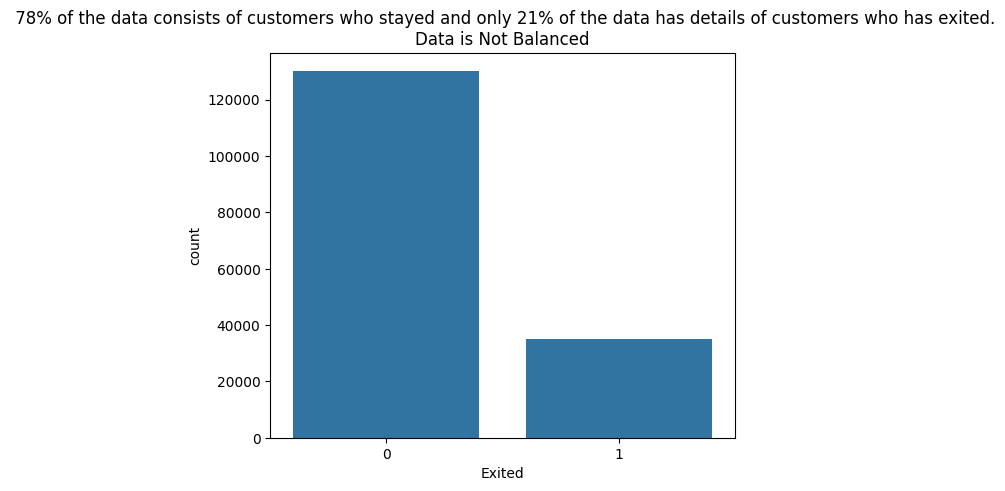

In [15]:
plt.figure(figsize=(6, 5))
plt.title(' 78% of the data consists of customers who stayed and only 21% of the data has details of customers who has exited.\nData is Not Balanced')
sns.countplot(x='Exited', data=df)

In [16]:
#Chrun ( Target Analysis )
df['Exited'].value_counts( normalize=True)

,proportion
Exited,
0,0.788401
1,0.211599


In [17]:
# 78% of tthe data contains Not exited and only 21% of the data has detials of custimers who has exited
# Data is Not Balanced

In [18]:
# Categorical summary
df.describe(include=['object']).T

,count,unique,top,freq
Surname,165034,2797,Hsia,2456
Geography,165034,3,France,94215
Gender,165034,2,Male,93150


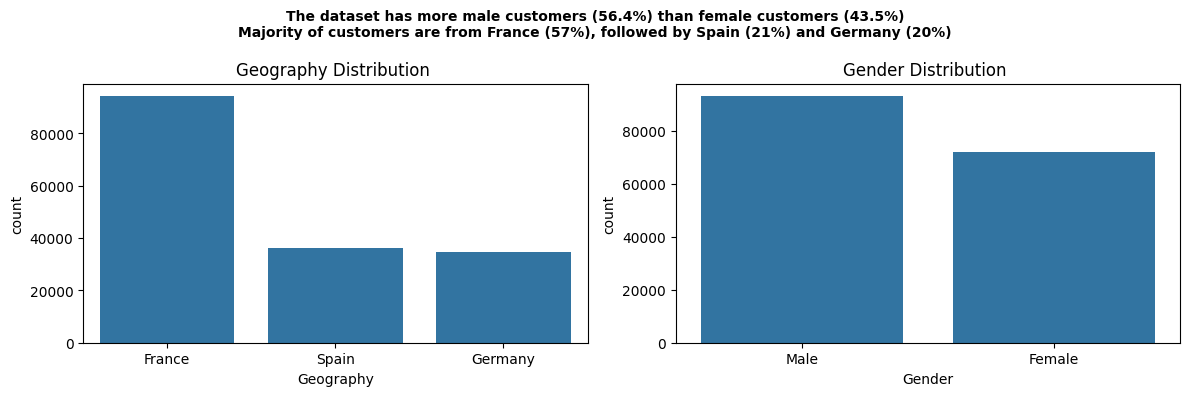

In [19]:
# Geography distribution
plt.figure(figsize=(12, 4))
plt.suptitle("""The dataset has more male customers (56.4%) than female customers (43.5%)
Majority of customers are from France (57%), followed by Spain (21%) and Germany (20%)""", fontsize=10, fontweight='bold')

plt.subplot(1,2,1)
plt.title('Geography Distribution ')
sns.countplot(x='Geography', data=df)


plt.subplot(1,2,2)
plt.title('Gender Distribution ')
sns.countplot(x='Gender', data=df)
plt.tight_layout()
plt.show()


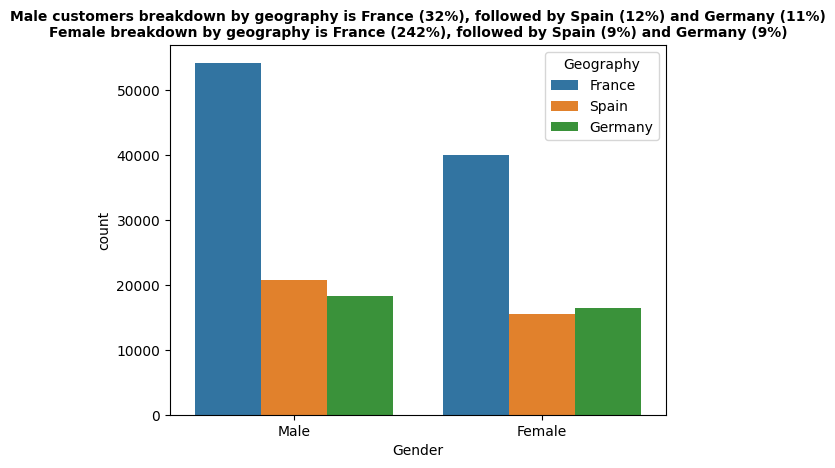

In [20]:
sns.countplot(x='Gender', data=df, hue = 'Geography')     # Male vs Female counts with Geography
plt.title("""Male customers breakdown by geography is France (32%), followed by Spain (12%) and Germany (11%)
Female breakdown by geography is France (242%), followed by Spain (9%) and Germany (9%)""", fontsize=10, fontweight='bold')
plt.show()

In [21]:
df['Geography'].groupby(df['Geography']).value_counts()/len(df)

,,count
Geography,Geography,
France,France,0.570882
Germany,Germany,0.209690
Spain,Spain,0.219428


In [22]:
df['Geography'].groupby(df['Gender']).value_counts()/len(df)

Gender  Geography
Female  France       0.242229
        Germany      0.099301
        Spain        0.094041
Male    France       0.328653
        Spain        0.125386
        Germany      0.110389
Name: count, dtype: float64

In [23]:
df['Gender'].groupby(df['Gender']).value_counts()/len(df)

,,count
Gender,Gender,
Female,Female,0.435571
Male,Male,0.564429


In [24]:
#Majority of customers are from France (57%), followed by Spain (21%) and Germany (20%).
#The dataset has more male customers (56.4%) than female customers (43.5%).

In [25]:
# Chrun Analysis
print(df.groupby('Geography')[['Exited']].mean().round(2))
print(df.groupby('Gender')[['Exited']].mean().round(2))

           Exited
Geography        
France       0.17
Germany      0.38
Spain        0.17
        Exited
Gender        
Female    0.28
Male      0.16


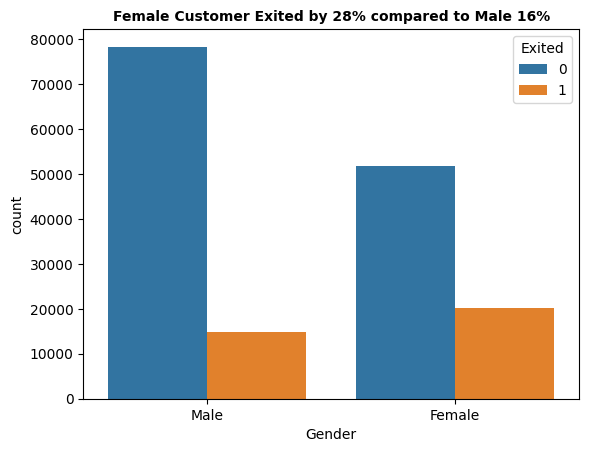

In [26]:
# Bivariate Analysis & plots
#num_cols = ['CreditScore', 'Age','Tenure', 'EstimatedSalary', 'Balance']

sns.countplot(x='Gender', hue='Exited', data=df)          # Gender vs Exixted
plt.title('Female Customer Exited by 28% compared to Male 16%' , fontsize=10, fontweight='bold')
plt.show()

Text(0.5, 1.0, 'Age Breakdown by Target(Exited)')

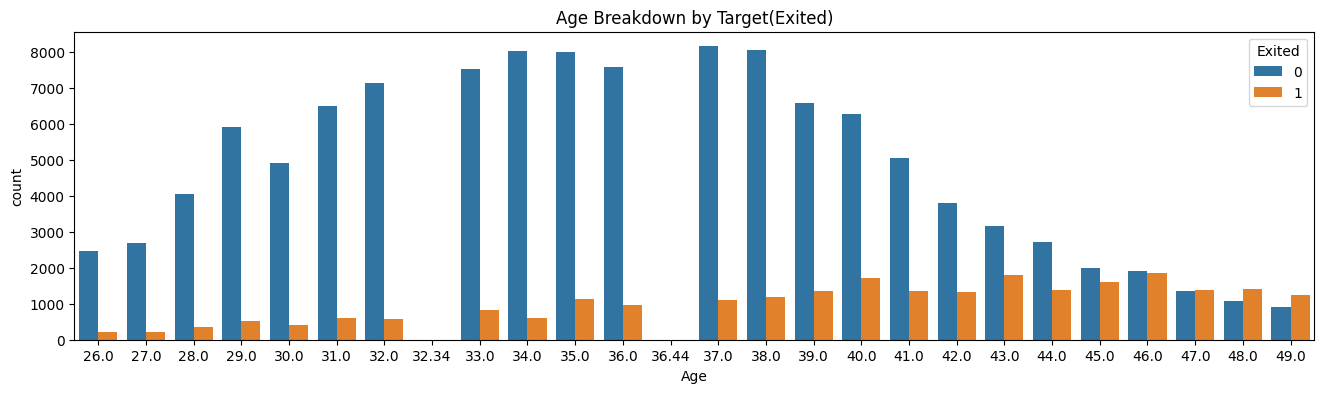

In [27]:
df_filter_G20 = df.query("Age > 25 and Age < 50")
plt.figure(figsize=(16, 4))
sns.countplot(x='Age', hue='Exited', data=df_filter_G20)          # Age vs Taeget (Exited)
plt.title('Age Breakdown by Target(Exited)')

#df.groupby('Age')[['Exited']].mean().round(2)/len(df)


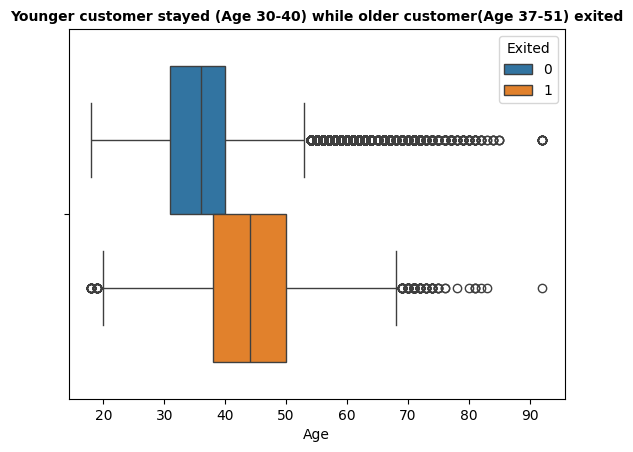

In [28]:
sns.boxplot(x='Age', hue='Exited', data=df)
plt.title('Younger customer stayed (Age 30-40) while older customer(Age 37-51) exited', fontsize=10, fontweight='bold')
plt.show()

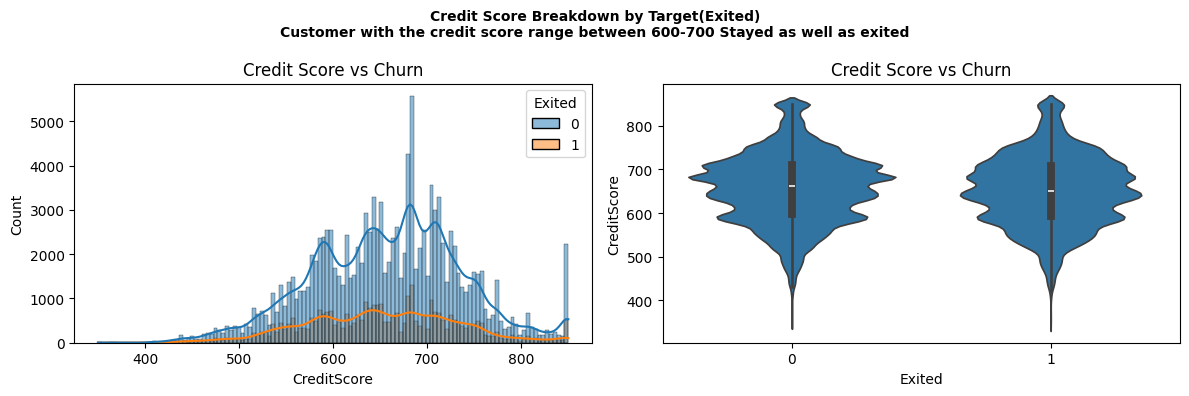

In [29]:

plt.figure(figsize=(12, 4))
plt.suptitle("""Credit Score Breakdown by Target(Exited)
Customer with the credit score range between 600-700 Stayed as well as exited""", fontsize=10, fontweight='bold')
plt.subplot(1,2,1)

sns.histplot(data=df, x='CreditScore', hue='Exited', fill=True, kde = True)
plt.title("Credit Score vs Churn")

plt.subplot(1,2,2)
sns.violinplot(x='Exited', y='CreditScore', data=df)
plt.title("Credit Score vs Churn")
plt.tight_layout()
plt.show()

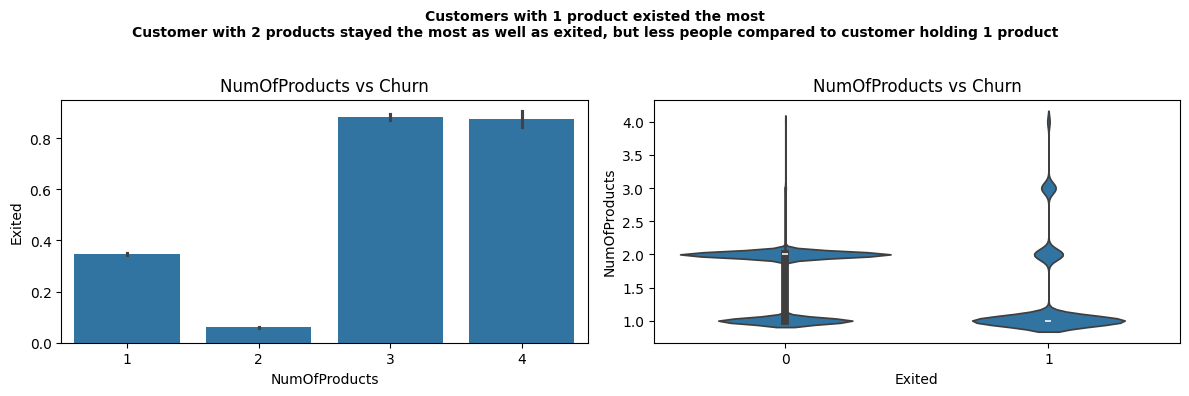

In [30]:
plt.figure(figsize=(12, 4))
plt.suptitle("""Customers with 1 product existed the most
Customer with 2 products stayed the most as well as exited, but less people compared to customer holding 1 product
""", fontsize=10, fontweight='bold')

plt.subplot(1,2,1)
sns.barplot(data=df, x='NumOfProducts', y='Exited')
plt.title("NumOfProducts vs Churn")

plt.subplot(1,2,2)
sns.violinplot(x='Exited', y='NumOfProducts', data=df)
plt.title("NumOfProducts vs Churn")
plt.tight_layout()
plt.show()

In [31]:
pd.crosstab(df['Gender'], df['Exited'], normalize='index')


Exited,0,1
Gender,,
Female,0.720313,0.279687
Male,0.840945,0.159055


In [32]:
#Multivariate
pd.crosstab([df['Geography'] ,df['Gender']] , df['Exited'], normalize='index')

Exited                   0         1
Geography Gender                    
France    Female  0.774815  0.225185
          Male    0.878869  0.121131
Germany   Female  0.536490  0.463510
          Male    0.697113  0.302887
Spain     Female  0.774034  0.225966
          Male    0.868168  0.131832

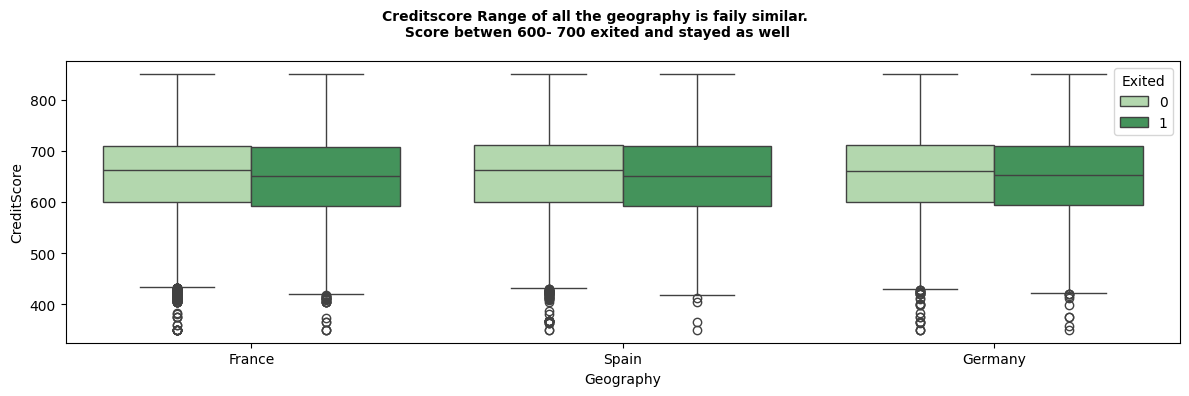

In [33]:

plt.figure(figsize=(12, 4))

sns.boxplot(data=df, x='Geography', y='CreditScore',hue = 'Exited', palette= 'Greens')

plt.suptitle("Creditscore Range of all the geography is faily similar.\n Score betwen 600- 700 exited and stayed as well", fontsize=10, fontweight='bold')
plt.tight_layout()


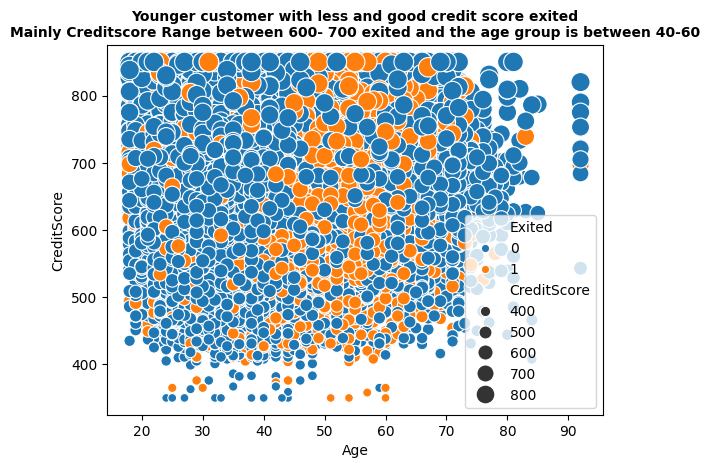

<Figure size 640x480 with 0 Axes>

In [34]:
sns.scatterplot(x='Age', y='CreditScore', hue = 'Exited', data=df , size = 'CreditScore' , sizes = (40,200) )
plt.title("""Younger customer with less and good credit score exited
Mainly Creditscore Range between 600- 700 exited and the age group is between 40-60""", fontsize=10, fontweight='bold')
plt.show()
plt.tight_layout()

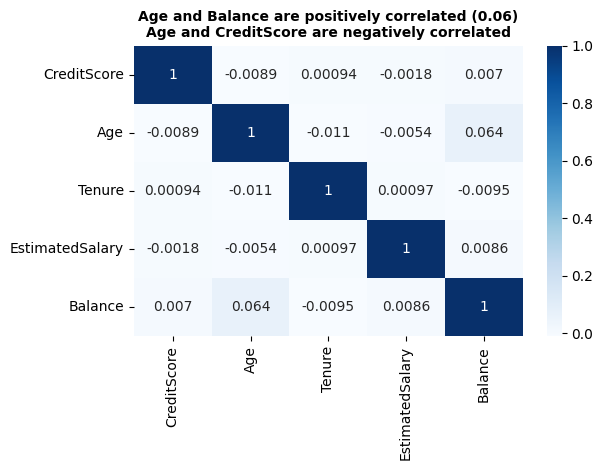

In [35]:
## Correlation matrix

num_cols = ['CreditScore', 'Age','Tenure', 'EstimatedSalary', 'Balance']
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues')
plt.title("""Age and Balance are positively correlated (0.06)
Age and CreditScore are negatively correlated""", fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

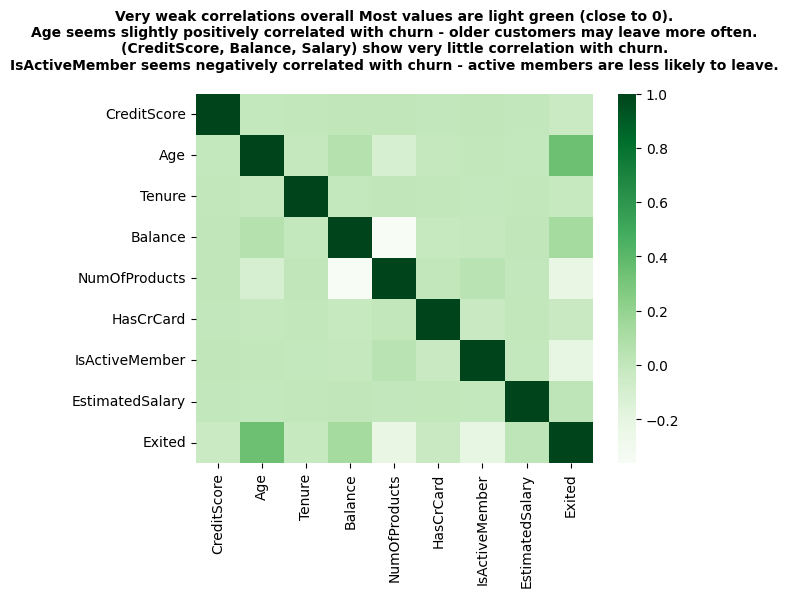

In [36]:
num_cols = ['CreditScore', 'Age','Tenure', 'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary', 'Exited']
sns.heatmap(df[num_cols].corr(),  cmap='Greens')  # Correlation matrix
plt.title("""Very weak correlations overall Most values are light green (close to 0).
Age seems slightly positively correlated with churn - older customers may leave more often.
(CreditScore, Balance, Salary) show very little correlation with churn.
IsActiveMember seems negatively correlated with churn - active members are less likely to leave.
""", fontsize=10, fontweight='bold')
plt.show()

In [37]:
#The dataset has more male customers (56.4%) than female customers (43.5%).
#Younger customer stayed while older customer exixted.
#Female Customer Exited by 27% compared to Male 15%
#when compared to the Georaphy
 #1 - Germany Female - 46% exited when compared to 22% for France & Spain
 #2-  Germany Male - 30 % Exited when compared to 12% and 13 % for France & spain
#Age and Balance are positively correlated (0.06)
#Age and CreditScore are negatively correlated
#Customers with 3 or more NumOfProducts exited than with 2 or less products.
# Credit score Range of all the geography is faily similar . Score betwen 600- 700 exited and stayed as well.
# customer with more credit score exited by large

### Step 4: Outlier Dectection

Identfying the Outliers in the data


In [38]:
def identify_outliers(dfdata, column):
    Q1 = dfdata[column].quantile(0.25)
    Q3 = dfdata[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound)
    print(upper_bound)

    return dfdata[(dfdata[column] > (upper_bound)) | (dfdata[column] <= ( lower_bound))]
    #print("Outliers:\n", outliers)

In [39]:
#Total Rows in the DataFrame  165034

In [40]:
identify_outliers(df, 'Age')

17.0
57.0


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
12,12,15717962,Rossi,759,Spain,Male,71.0,9,0.00,1,1.0,1.0,93081.87,0
19,19,15650670,Ts'ui,559,France,Male,61.0,1,153711.26,1,0.0,1.0,180890.40,1
27,27,15765461,Shih,586,France,Female,58.0,2,147262.11,1,1.0,1.0,100835.19,0
39,39,15653849,Ting,747,Germany,Male,58.0,9,114514.71,1,1.0,0.0,45414.12,1
84,84,15777797,Nnaemeka,637,Spain,Male,64.0,1,0.00,1,0.0,1.0,181490.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164850,164850,15607786,Smith,755,France,Female,67.0,7,144432.04,1,0.0,1.0,103945.58,0
164852,164852,15747591,Tuan,716,Spain,Male,59.0,2,149961.18,1,1.0,1.0,179814.40,0
164873,164873,15795954,T'ien,657,Spain,Male,75.0,7,0.00,2,1.0,1.0,123866.43,0
165012,165012,15815050,Trevisani,746,Germany,Female,60.0,3,108805.42,2,1.0,0.0,78744.37,1


In [41]:
# CreditScore, Tenure,Balance, HasCrCard, IsActiveMember , EstimatedSalary all Columns are with in the Range
# Age & NumOfProducts Has Outliers
# Age - Range 6 To 70
# NumOfProducts - Range -0.5 to 3.5


In [42]:
#breakdown of products
df['NumOfProducts'].value_counts(normalize = True)

,proportion
NumOfProducts,
2,0.510749
1,0.468837
3,0.017536
4,0.002878


In [43]:
df['NumOfProducts'].groupby(df['Exited']).value_counts(normalize = True)

Exited  NumOfProducts
0       2                0.608686
        1                0.388247
        3                0.002613
        4                0.000453
1       1                0.769107
        2                0.145843
        3                0.073137
        4                0.011913
Name: proportion, dtype: float64

In [44]:
# Majority of the data is of the customers with 1 & 2 products (46% & 51%)
# Remaining 3 % of data is distrubvuted between 3 & 4 Products.
# 76% of the customer with 1 product Exited and that decreases when customer has 2 products ( stayed - 60%).

In [45]:
# Checking the Data for Age
df_Great_age57 = df.query("Age > 57")

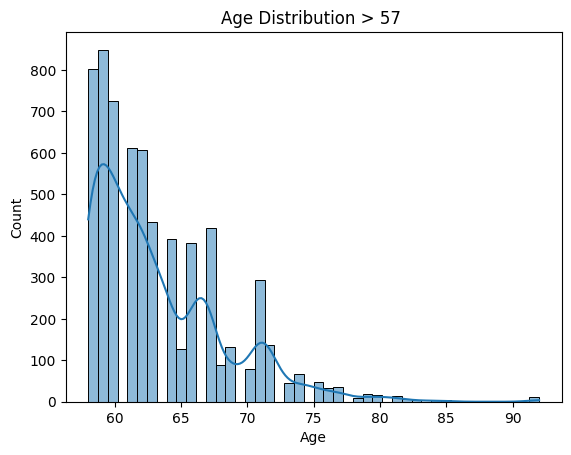

In [46]:

sns.histplot(x='Age', data=df_Great_age57, kde=True)
plt.title("Age Distribution > 57 ")    # Age distribution
plt.show()

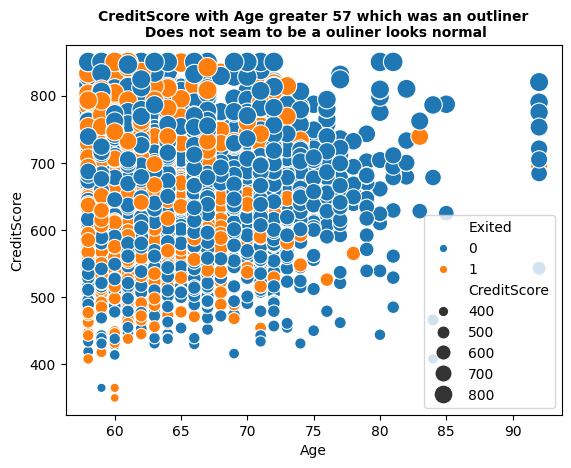

In [47]:
sns.scatterplot(x='Age', y='CreditScore', hue = 'Exited', data=df_Great_age57 , size = 'CreditScore' , sizes = (40,200) )
plt.title("CreditScore with Age greater 57 which was an outliner\n Does not seam to be a ouliner looks normal" , fontsize=10, fontweight='bold'  )
plt.show()

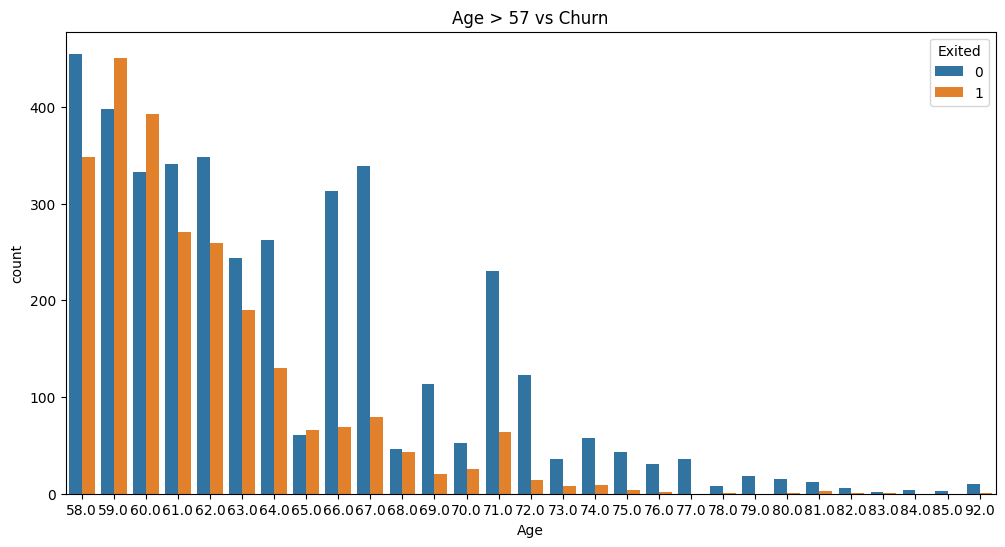

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', data=df_Great_age57, hue = 'Exited')
plt.title('Age > 57 vs Churn')
plt.show()

In [49]:
# Checking the Data for Age
df_Great3_product = df.query("NumOfProducts == 4")

In [50]:
df_Great3_product

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
182,182,15671973,Kesteven,674,Spain,Male,51.0,0,0.00,4,0.0,1.0,145562.40,1
223,223,15589475,Mazzanti,744,Germany,Male,53.0,8,108004.64,4,1.0,0.0,140941.46,1
1030,1030,15679622,Okechukwu,815,France,Male,43.0,4,0.00,4,1.0,1.0,133692.88,1
1257,1257,15670374,Wright,819,Germany,Female,36.0,1,120656.86,4,0.0,0.0,166164.30,1
1590,1590,15682463,Trevisani,706,Germany,Male,46.0,8,133070.11,4,1.0,0.0,79919.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162369,162369,15781326,Ritchie,699,Germany,Female,47.0,7,139753.83,4,0.0,1.0,57921.95,1
163369,163369,15583863,Kosisochukwu,682,Spain,Male,55.0,7,0.00,4,1.0,0.0,186778.89,1
163513,163513,15770091,Mactier,676,France,Female,48.0,4,0.00,4,1.0,0.0,102925.53,1
163549,163549,15595537,Hsia,548,Spain,Female,55.0,5,0.00,4,1.0,0.0,158036.97,1


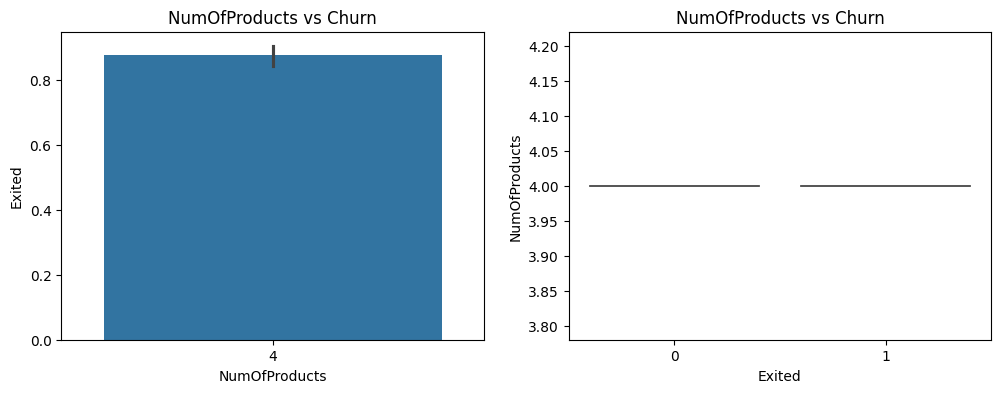

In [51]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
sns.barplot(data=df_Great3_product, x='NumOfProducts', y='Exited')
plt.title("NumOfProducts vs Churn")

plt.subplot(1,2,2)
sns.violinplot(x='Exited', y='NumOfProducts', data=df_Great3_product)
plt.title("NumOfProducts vs Churn")
plt.show()

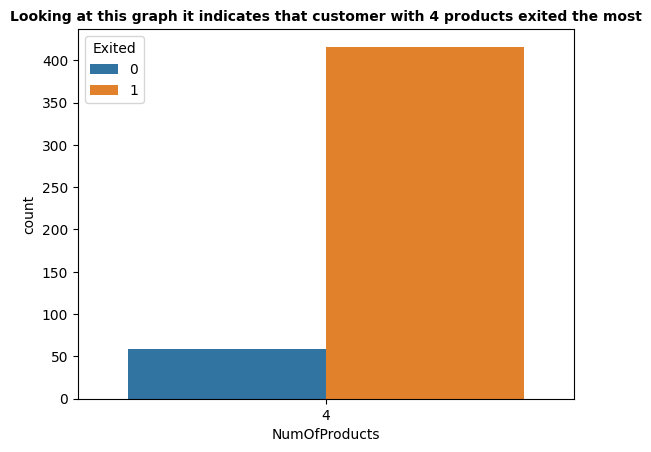

In [52]:
sns.countplot(x='NumOfProducts', hue = 'Exited', data=df_Great3_product)
plt.title("Looking at this graph it indicates that customer with 4 products exited the most" , fontsize = 10,fontweight='bold' )
plt.show()

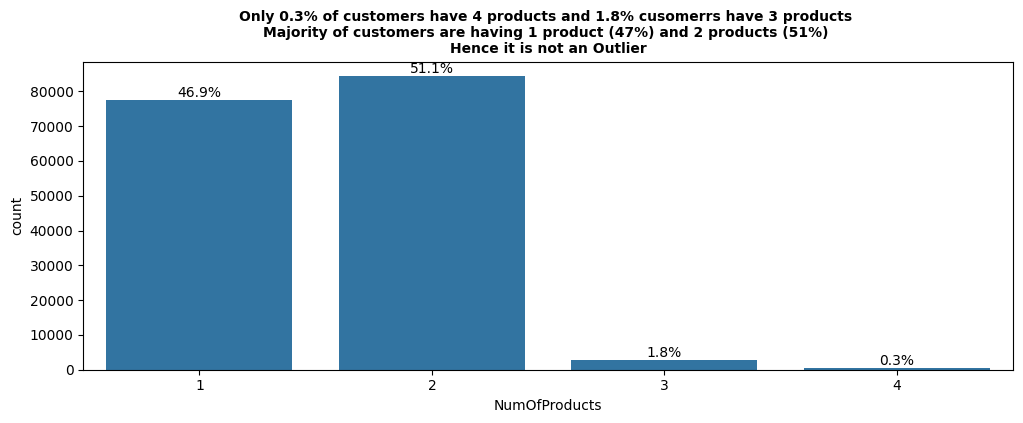

In [53]:
# Geography distribution
plt.figure(figsize=(12, 4))
plt.title("""Only 0.3% of customers have 4 products and 1.8% cusomerrs have 3 products
Majority of customers are having 1 product (47%) and 2 products (51%)
Hence it is not an Outlier""", fontsize=10, fontweight='bold')
ax = sns.countplot(x='NumOfProducts', data=df)


total = len(df)
for p in ax.patches:
    percentage = 100 * p.get_height() / total
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

In [54]:
# CreditScore, Tenure,Balance, HasCrCard, IsActiveMember , EstimatedSalary all Columns are with in the Range
# Age & NumOfProducts Has Outliers
# Age - Range 6 To 70
# NumOfProducts - Range -0.5 to 3.5
# Customers with 4 products exited majority of them.

### Step 5: Cleaning the data & Dummy Base model

After examining the data - EDA, Removing unwanted columns and making the data ready for Modeliing.

In [55]:
#looking at the Target column (Exited) earlier Data is not balanced.
df['Exited'].value_counts()

,count
Exited,
0,130113
1,34921


In [56]:
# we can do Oversampling or Undersampling to make the data balanced.
# but we will be loosing some majority data.
# SMOTE

In [57]:
X = df.drop(['id', 'CustomerId', 'Exited','Surname'], axis=1)
y = df['Exited']

In [58]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import time

In [60]:
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [61]:
numerical_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_test # 132,027 , 33,007

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
33042,798,France,Female,31.0,8,102075.88,1,1.0,0.0,79577.48
36330,629,France,Male,26.0,6,0.00,2,1.0,0.0,38190.78
59446,565,France,Male,39.0,7,115163.32,3,1.0,0.0,69052.63
92278,653,Spain,Male,55.0,2,70263.83,1,0.0,0.0,62347.71
146750,557,France,Female,31.0,6,106596.29,1,1.0,0.0,91305.77
...,...,...,...,...,...,...,...,...,...,...
32661,719,France,Female,27.0,2,0.00,2,1.0,1.0,74800.99
117592,773,France,Female,32.0,4,0.00,1,1.0,0.0,93983.12
2194,767,Germany,Female,35.0,7,132253.22,1,1.0,0.0,115566.57
141678,653,France,Female,33.0,9,0.00,2,1.0,1.0,124489.88


In [64]:
#do the encoding here
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
    )

In [65]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [66]:
#BaseModel Preparation - Dummy
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score, f1_score

In [67]:
baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train_transformed, y_train)
y_base = baseline.predict(X_test_transformed)

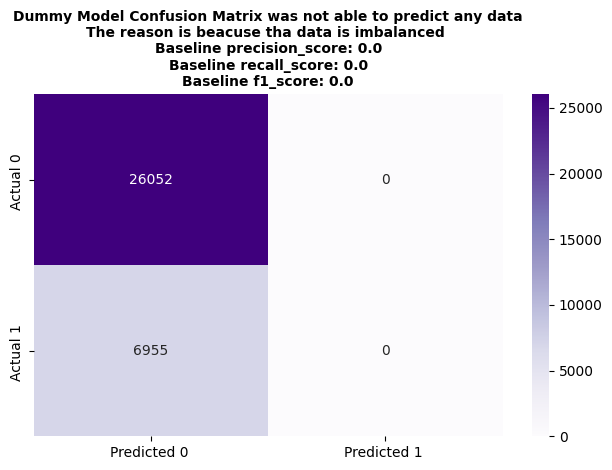

Baseline accuracy: 0.7892871209137455
Baseline precision_score: 0.0
Baseline recall_score: 0.0
Baseline f1_score: 0.0


In [68]:
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_base))
cm = confusion_matrix(y_test,y_base)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
        xticklabels=['Predicted 0 ', 'Predicted 1 '],
        yticklabels=['Actual 0 ', 'Actual 1 '])
plt.title("""Dummy Model Confusion Matrix was not able to predict any data
The reason is beacuse tha data is imbalanced
Baseline precision_score: 0.0
Baseline recall_score: 0.0
Baseline f1_score: 0.0""" , fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

print("Baseline accuracy:", accuracy_score(y_test, y_base))
print("Baseline precision_score:", precision_score(y_test, y_base))
print("Baseline recall_score:", recall_score(y_test, y_base))
print("Baseline f1_score:", f1_score(y_test, y_base))

In [69]:
# If you see the Above Confusion Matrix, The base model has Precison , Recall & f1_ score all Zero's.
# The reason is beacuse data is not balanced
# because no positives (Exited=1) were predicted


### Step 7: Fine Tuning a Baseline Dummy Model

Fine Tuning the base model so that we can get Proper Prediction rather than biased prediction

In [70]:
### Oversampling / Undersampling / SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

baseline = DummyClassifier(strategy='stratified')
baseline.fit(X_train_res, y_train_res)
y_base = baseline.predict(X_test_transformed)

#print("Original:", y_train.value_counts(normalize=True))
#print("After SMOTE:", y_train_res.value_counts(normalize=True))
#print("Test:", y_test.value_counts(normalize=True))

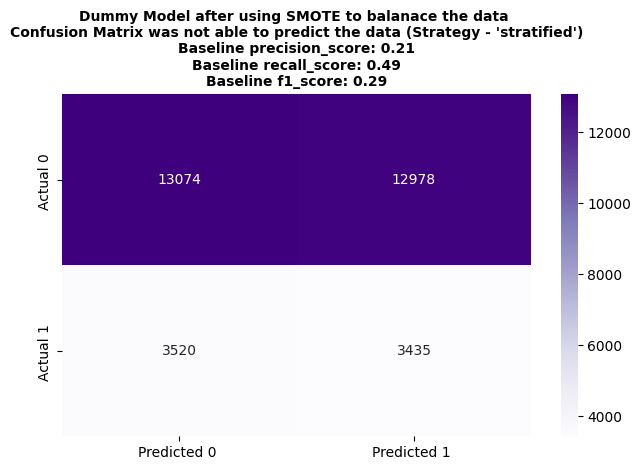

Baseline accuracy: 0.500166631320629
Baseline precision_score: 0.2092853226101261
Baseline recall_score: 0.49388928828181167
Baseline f1_score: 0.2939917836357412


In [71]:
##print("Confusion Matrix:\n", confusion_matrix(y_test, y_base))
cm = confusion_matrix(y_test, y_base)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
        xticklabels=['Predicted 0 ', 'Predicted 1 '],
        yticklabels=['Actual 0 ', 'Actual 1 '])
plt.title("""Dummy Model after using SMOTE to balanace the data
Confusion Matrix was not able to predict the data (Strategy - 'stratified')
Baseline precision_score: 0.21
Baseline recall_score: 0.49
Baseline f1_score: 0.29""" , fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

print("Baseline accuracy:", accuracy_score(y_test, y_base))
print("Baseline precision_score:", precision_score(y_test, y_base))
print("Baseline recall_score:", recall_score(y_test, y_base))
print("Baseline f1_score:", f1_score(y_test, y_base))

Encoding section

#Model Comparisons

Now, aim to compare the performance of various models like Logistic Regression, KNN algorithm, Decision Tree, and SVM models.  

### Split & Transform Data

In [72]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
    )

In [75]:
# Fit on training, transform both sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

### Model - With SVN

In [113]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=50),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'SVM': SVC()
}

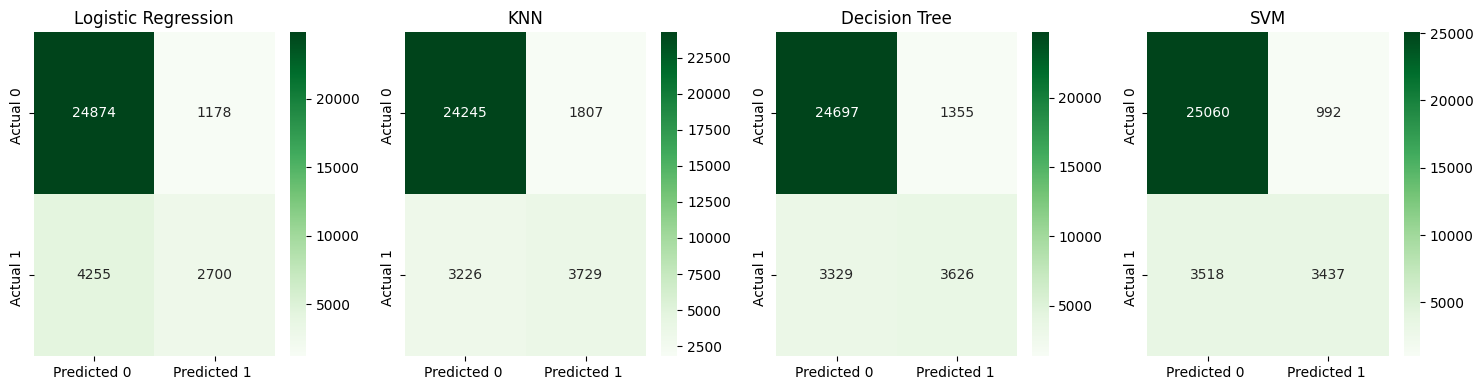


Model Performance Comparison:


,name,accuracy,precision,recall,f1,end_time
0,Logistic Regression,0.84,0.70,0.39,0.50,0.24
1,KNN,0.85,0.67,0.54,0.60,11.89
2,Decision Tree,0.86,0.73,0.52,0.61,0.39
3,SVM,0.86,0.78,0.49,0.60,1064.11


In [114]:
fig, axes = plt.subplots(1, len(models), figsize=(15, 4))
if len(models) == 1:
    axes = [axes]

results_lessdf= []

#metrics_df = pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1-score" , "End-Time"])

for ax, (name, model) in zip (axes, models.items()):
    start_time = time.time()
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    end_time = time.time() - start_time

    #metrices
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_lessdf.append([name, accuracy, precision, recall, f1, end_time])

    # Plot heatmap
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',ax=ax,
            xticklabels=['Predicted 0 ', 'Predicted 1 '],
            yticklabels=['Actual 0 ', 'Actual 1 '])
    ax.set_title(name)

plt.tight_layout()
plt.show()

# Display metrics table
print("\nModel Performance Comparison:")
results_fd = pd.DataFrame(results_lessdf, columns=['name','accuracy', 'precision', 'recall', 'f1', 'end_time' ]).round(2)
results_fd

In [ ]:
    #'Logistic Regression': LogisticRegression(max_iter=50),
    #'KNN': KNeighborsClassifier(n_neighbors=5),
    #'Decision Tree': DecisionTreeClassifier(max_depth=5),
    #'SVM': SVC(probability=True),  # probability=True needed for ROC-AUC

###- Models with out SVN - As SVN is taking too long

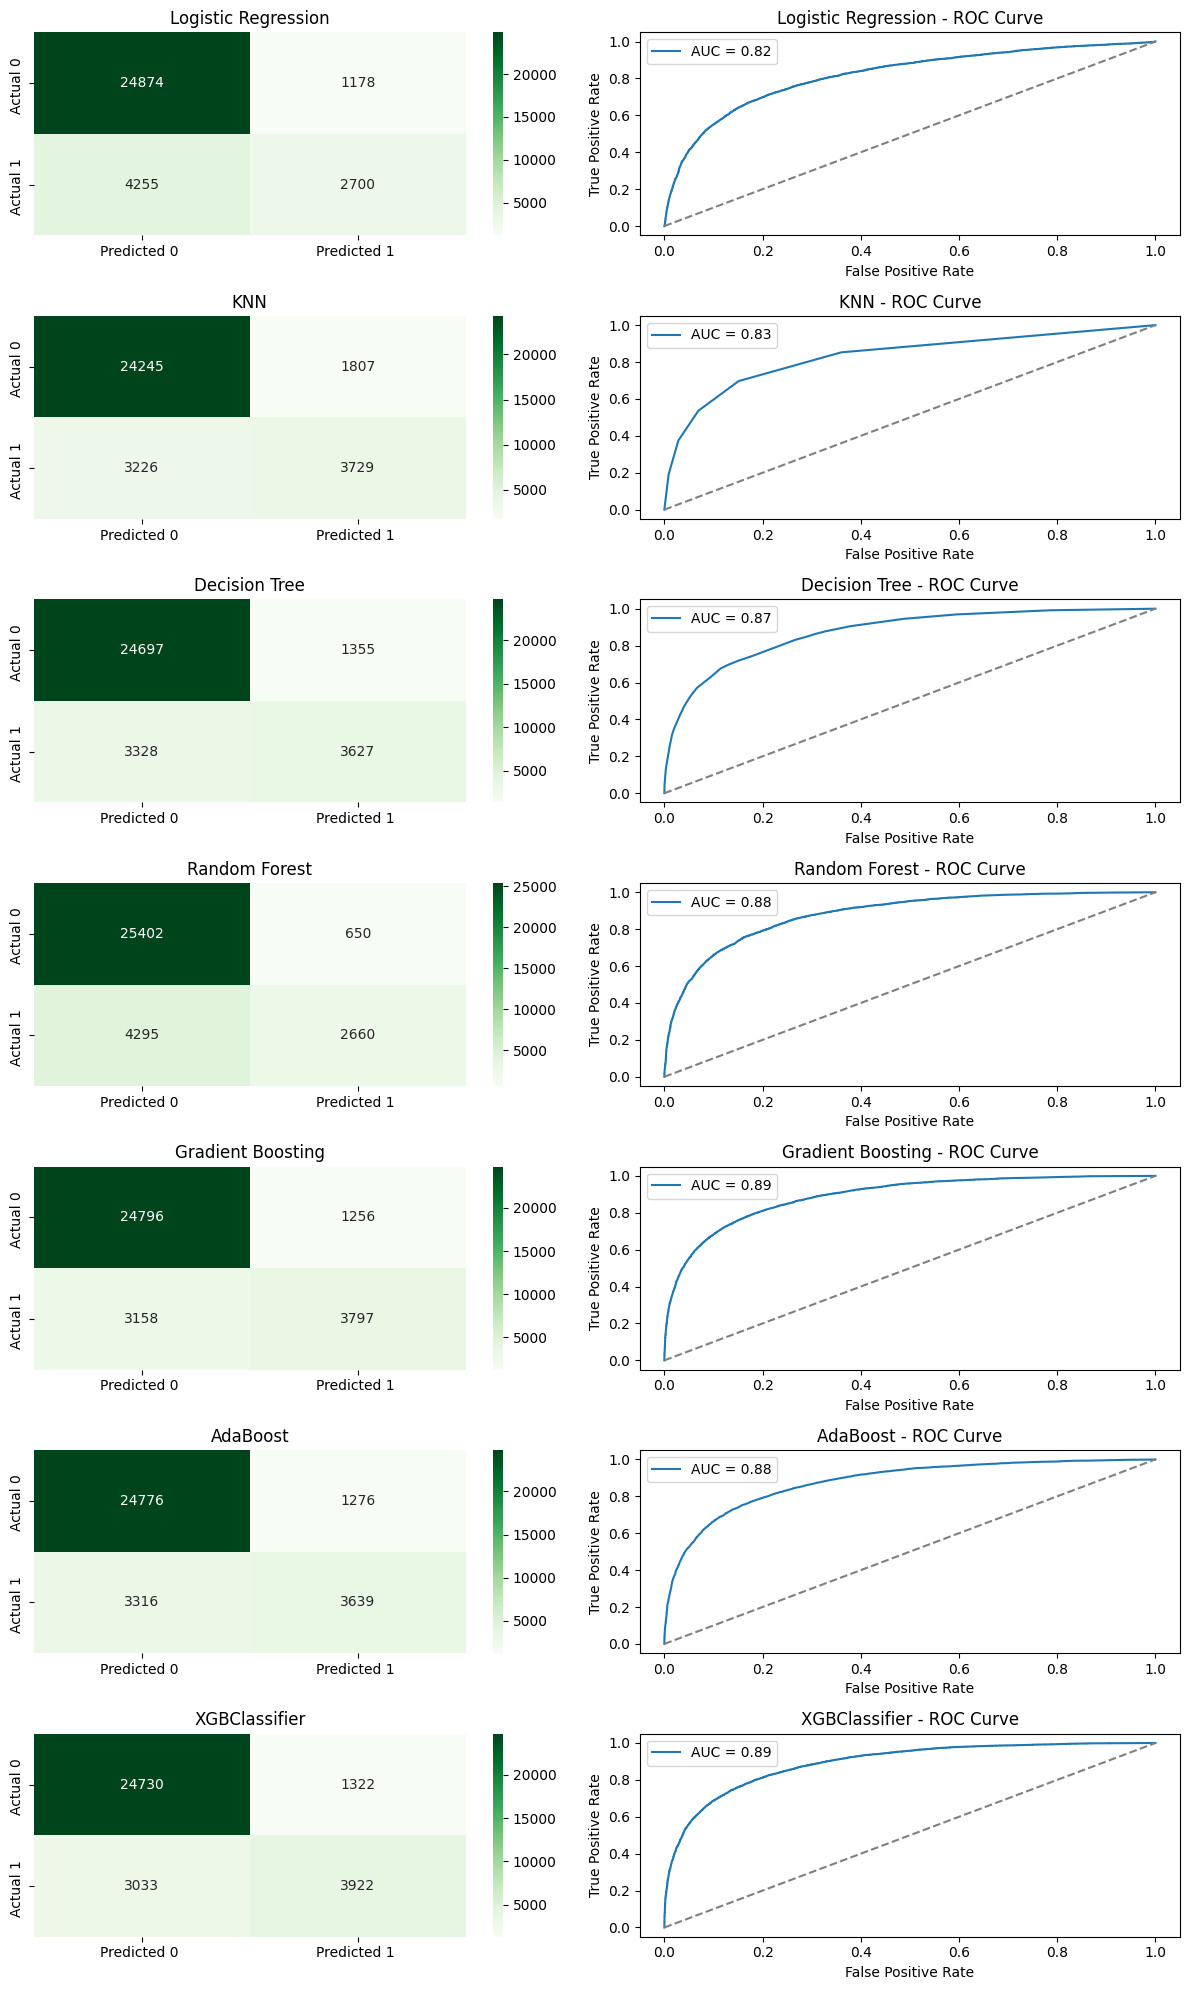

                 Model  Accuracy  Precision    Recall  F1-score  auc_value  Train Time
0  Logistic Regression  0.835399   0.696235  0.388210  0.498477   0.818049    0.160245
1                  KNN  0.847517   0.673591  0.536161  0.597070   0.829963   23.840333
2        Decision Tree  0.858121   0.728021  0.521495  0.607690   0.873008    0.359203
3        Random Forest  0.850183   0.803625  0.382459  0.518266   0.880979   10.783565
4    Gradient Boosting  0.866271   0.751435  0.545938  0.632412   0.889899   25.681463
5             AdaBoost  0.860878   0.740387  0.523221  0.613142   0.878964    9.679410
6        XGBClassifier  0.868058   0.747902  0.563911  0.643004   0.891581    2.212423


In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
# Models dictionary
models = {
    'Logistic Regression': LogisticRegression(max_iter=50),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'XGBClassifier': XGBClassifier(n_estimators=300,learning_rate=0.05,max_depth=5,subsample=0.8,colsample_bytree=0.8,random_state=42,use_label_encoder=False,eval_metric='logloss')
}

results_lessdf = []
results_cmdf = []

# Setup figure: 2 rows -> top = confusion matrices, bottom = ROC curves
#fig, axes = plt.subplots(2, len(models), figsize=(20, 8))
fig, axes = plt.subplots(len(models),2, figsize=(12, 20))

for col, (name, model) in enumerate(models.items()):
    start_time = time.time()
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    y_proba = model.predict_proba(X_test_transformed)[:, 1]  # for ROC
    end_time = time.time() - start_time

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_value = roc_auc_score(y_test, y_proba)

    results_lessdf.append([name, accuracy, precision, recall, f1, auc_value, end_time])

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Predicted 0 ', 'Predicted 1 '],
                yticklabels=['Actual 0 ', 'Actual 1 '],
                ax=axes[col,0])
    axes[col, 0].set_title(name)

    tn, fp, fn, tp = cm.ravel()
    results_cmdf.append([name, tn, fp, fn, tp])

    ## ROC curve
    #fpr, tpr, _ = roc_curve(y_test, y_proba)
    #roc_auc = auc(fpr, tpr)
    #axes[col , 1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    #axes[col , 1].plot([0, 1], [0, 1], 'k--')
    #axes[col , 1].set_title(f"{name} ROC")
    #axes[col , 1].legend(loc="lower right")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    axes[col, 1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    axes[col, 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axes[col, 1].set_title(f"{name} - ROC Curve")
    axes[col, 1].set_xlabel("False Positive Rate")
    axes[col, 1].set_ylabel("True Positive Rate")
    axes[col, 1].legend()

plt.tight_layout()
plt.show()

# Convert results to DataFrame for summary
metrics_df = pd.DataFrame(results_lessdf, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "auc_value", "Train Time"])
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
print(metrics_df)

XGBOOST -- for real-world, large-scale, or competition-grade modeling. Trying it out

In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Create XGBoost model
xgb_model = XGBClassifier(
    n_estimators=300,        # number of trees
    learning_rate=0.05,      # step size shrinkage
    max_depth=5,             # maximum tree depth
    subsample=0.8,           # fraction of samples per tree
    colsample_bytree=0.8,    # fraction of features per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'    # avoids warning
)

# Train
xgb_model.fit(X_train_res, y_train_res)

# Predict
y_pred = xgb_model.predict(X_test_transformed)
y_proba = xgb_model.predict_proba(X_test_transformed)[:, 1]  # for AUC




Accuracy: 0.8539
Precision: 0.6454
Recall: 0.6808
F1-score: 0.6627
AUC: 0.8884


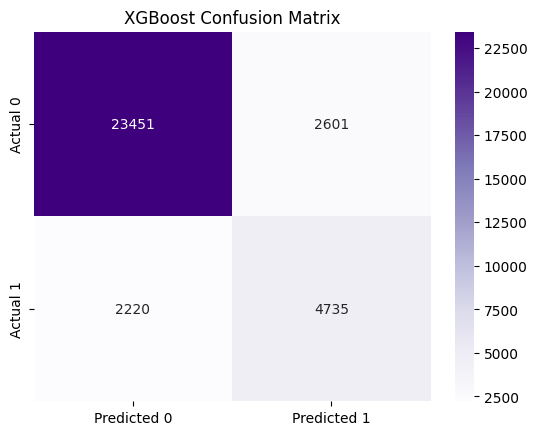

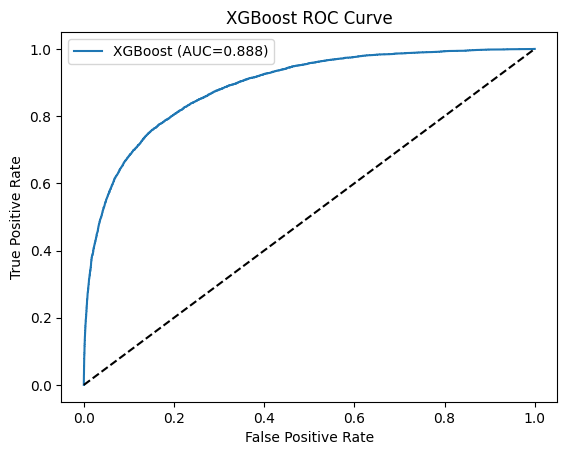

In [78]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("XGBoost Confusion Matrix")
plt.show()



fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'XGBoost (AUC={auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

### Neural Network - Model

In [ ]:
pip install keras_tuner

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam


In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ]
    )
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

neuromodel = Sequential(
    [
        Dense(50, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ]
)
neuromodel.compile(optimizer=Adam(learning_rate=0.003), loss = 'bce', metrics = ['acc',AUC(name='my_auc')])
history1 = neuromodel.fit(X_train_transformed, y_train, validation_data = (X_test_transformed, y_test),
                     epochs = 10, verbose = 0)


train_acc = history1.history['acc'][-1]
train_auc = history1.history['my_auc'][-1]
val_acc = history1.history['val_acc'][-1]
val_auc = history1.history['val_my_auc'][-1]

print(history1.history.keys())
print("Train Accuracy:", train_acc)
print("Train AUC:", train_auc)
print("Validation Accuracy:", val_acc)
print("Validation AUC:", val_auc)

dict_keys(['acc', 'loss', 'my_auc', 'val_acc', 'val_loss', 'val_my_auc'])
Train Accuracy: 0.8641566038131714
Train AUC: 0.8864476680755615
Validation Accuracy: 0.8606961965560913
Validation AUC: 0.8879155516624451


# Improving the Model

Now that we have some basic models on the board, we want to try to improve these.


### Hyperparameter Tuning for Models -  Random Forest , Gradient Boosting & Logistic Regression

In [76]:
# Models dictionary for Tuning as they are the best AUC and wanted to see Logistic Regression
models = {
    'Logistic Regression': LogisticRegression(max_iter=50),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
}


In [77]:
param_grids = {
    'Logistic Regression': {
        'C': np.logspace(-3, 2, 6),          # 0.001 to 100
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 1.0]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
     }
}


In [81]:
best_results = {}

for name, model in models.items():
    print(f"\n Tuning {name}...")
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=10,                # number of random combinations
        scoring='roc_auc',
        cv=5,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    search.fit(X_train_transformed, y_train)

    best_results[name] = {
        'best_params': search.best_params_,
        'best_auc': search.best_score_
    }

# ------------------------------
# Print summary of results
# ------------------------------
print("\n Hyperparameter Tuning Summary:")
for name, result in best_results.items():
    print(f"\n{name}:")
    print(f"  Best AUC: {result['best_auc']:.4f}")
    print(f"  Best Params: {result['best_params']}")


 Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Tuning Gradient Boosting...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Tuning AdaBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

 Hyperparameter Tuning Summary:

Logistic Regression:
  Best AUC: 0.8178
  Best Params: {'solver': 'saga', 'penalty': 'l1', 'C': np.float64(0.01)}

Random Forest:
  Best AUC: 0.8875
  Best Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}

Gradient Boosting:
  Best AUC: 0.8891
  Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}

AdaBoost:
  Best AUC: 0.8785
  Best Params: {'n_estimators': 200, 'learning_rate': 1.0}


### Improving Random Forest , Gradient Boosting & Logistic Regression - Based on Hyper Parameter Results

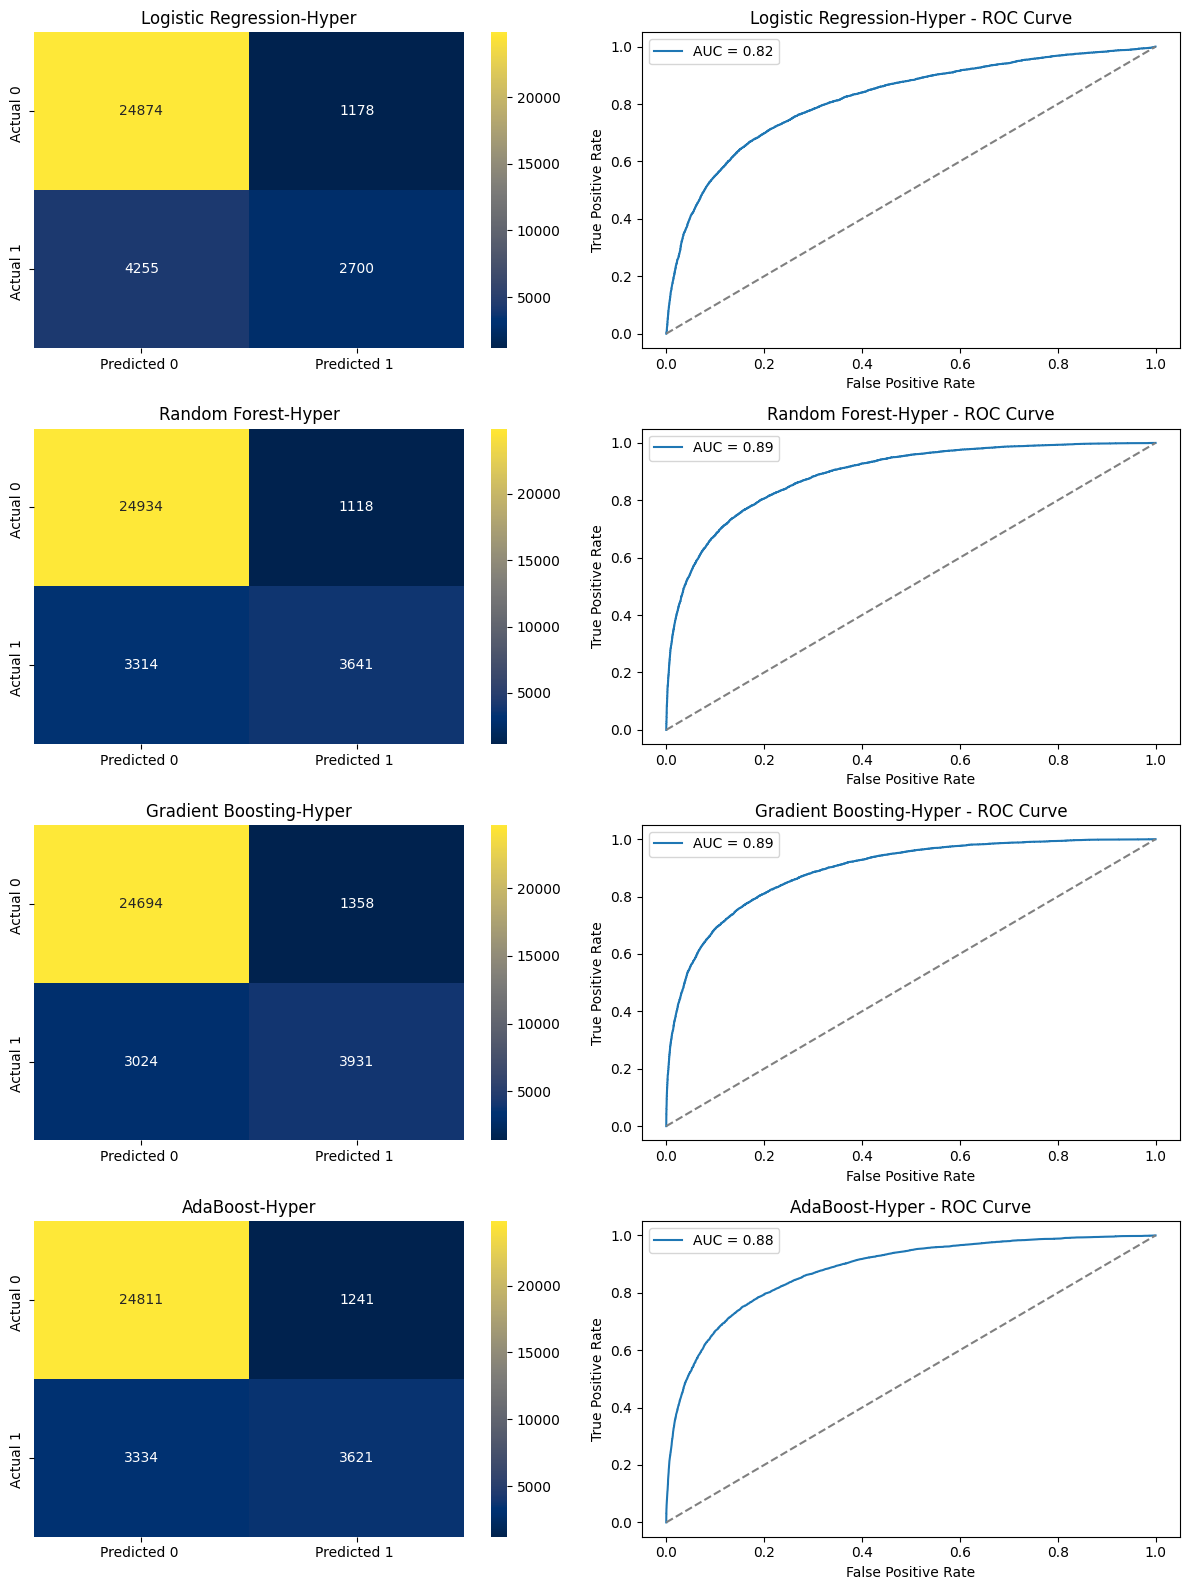

                       Model  Accuracy  Precision    Recall  F1-score  auc_value  Train Time
0  Logistic Regression-Hyper  0.835399   0.696235  0.388210  0.498477   0.818049    0.205353
1        Random Forest-Hyper  0.865725   0.765077  0.523508  0.621649   0.889350   70.398758
2    Gradient Boosting-Hyper  0.867240   0.743241  0.565205  0.642110   0.891166   60.568369
3             AdaBoost-Hyper  0.861393   0.744755  0.520633  0.612846   0.879635   19.313807


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score
# Models dictionary
models = {
    'Logistic Regression-Hyper': LogisticRegression(max_iter=50),
    'Random Forest-Hyper': RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=2,min_samples_leaf=2,max_features='log2', random_state=42),
    'Gradient Boosting-Hyper': GradientBoostingClassifier(n_estimators=200,max_depth= 5,learning_rate= 0.05,subsample= 0.8, random_state=42),
    'AdaBoost-Hyper': AdaBoostClassifier(n_estimators=200,learning_rate =1.0 ,random_state=42),
 }


results_lessdf = []


# Setup figure: 2 rows -> top = confusion matrices, bottom = ROC curves
#fig, axes = plt.subplots(2, len(models), figsize=(20, 8))
fig, axes = plt.subplots(len(models),2, figsize=(12, 16))

for col, (name, model) in enumerate(models.items()):
    start_time = time.time()
    model.fit(X_train_transformed, y_train)
    y_pred = model.predict(X_test_transformed)
    y_proba = model.predict_proba(X_test_transformed)[:, 1]  # for ROC
    end_time = time.time() - start_time

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_value = roc_auc_score(y_test, y_proba)
    results_lessdf.append([name, accuracy, precision, recall, f1, auc_value, end_time])

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='cividis',
                xticklabels=['Predicted 0 ', 'Predicted 1 '],
                yticklabels=['Actual 0 ', 'Actual 1 '],
                ax=axes[col,0])
    axes[col, 0].set_title(name)

    tn, fp, fn, tp = cm.ravel()
    results_cmdf.append([name, tn, fp, fn, tp])

    ## ROC curve
    #fpr, tpr, _ = roc_curve(y_test, y_proba)
    #roc_auc = auc(fpr, tpr)
    #axes[col , 1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    #axes[col , 1].plot([0, 1], [0, 1], 'k--')
    #axes[col , 1].set_title(f"{name} ROC")
    #axes[col , 1].legend(loc="lower right")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    axes[col, 1].plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    axes[col, 1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axes[col, 1].set_title(f"{name} - ROC Curve")
    axes[col, 1].set_xlabel("False Positive Rate")
    axes[col, 1].set_ylabel("True Positive Rate")
    axes[col, 1].legend()

plt.tight_layout()
plt.show()

# Convert results to DataFrame for summary
metrics_df = pd.DataFrame(results_lessdf, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "auc_value", "Train Time"])
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
print(metrics_df)

In [103]:
metrics_cmdf = pd.DataFrame(results_cmdf, columns=["Model", "TN", "FP", "FN", "TP"])
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', None)
print(metrics_cmdf)

                        Model     TN    FP    FN    TP
0         Logistic Regression  24874  1178  4255  2700
1                         KNN  24245  1807  3226  3729
2               Decision Tree  24697  1355  3329  3626
3               Random Forest  25402   650  4295  2660
4           Gradient Boosting  24796  1256  3158  3797
5                    AdaBoost  24776  1276  3316  3639
6               XGBClassifier  24730  1322  3033  3922
7   Logistic Regression-Hyper  24874  1178  4255  2700
8         Random Forest-Hyper  24934  1118  3314  3641
9     Gradient Boosting-Hyper  24694  1358  3024  3931
10             AdaBoost-Hyper  24811  1241  3334  3621
11              XGBoost-Hyper  24649  1403  3048  3907



### Improving XGBClassifier -- Hyperparameter Tuning


In [160]:


param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)
xgb_search.fit(X_train_res, y_train_res)

print("Best Params:", xgb_search.best_params_)
print("Best AUC:", xgb_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best AUC: 0.9603457830541924


### Improving Neural Network -- Hyperparameter Tuning

In [ ]:
learning_rates = [0.002, 0.003, 0.004, 0.005]
batch_sizes = [50, 100, 150, 200]

neuromodel = Sequential(
    [
        Dense(50, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
    ]
)
neuromodel.compile(optimizer=Adam(learning_rate=0.003), loss = 'bce', metrics = ['acc',AUC(name='my_auc')])
history1 = neuromodel.fit(X_train_transformed, y_train, validation_data = (X_test_transformed, y_test),
                     epochs = 10, verbose = 0)


train_acc = history1.history['acc'][-1]
train_auc = history1.history['my_auc'][-1]
val_acc = history1.history['val_acc'][-1]
val_auc = history1.history['val_my_auc'][-1]

In [130]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units', min_value=16, max_value=128, step=16),
        activation='relu'
    ))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('lr', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy', AUC(name='my_auc')]
    )
    return model

In [135]:
tuner = kt.RandomSearch(
    build_model,
    kt.Objective("val_my_auc", direction="max"),     # optimize for AUC, corrected parameter name
    max_trials=10,              # number of parameter combinations
    directory='tuner_results',
    project_name='neuro_tuning'
)

tuner.search(
    X_train_transformed, y_train,
    validation_data=(X_test_transformed, y_test),
    epochs=10,
    verbose=1
)

# Get best model
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]
print("Best Units:", best_hps.get('units'))
print("Best LR:", best_hps.get('lr'))

Trial 10 Complete [00h 01m 50s]
val_my_auc: 0.8853480219841003

Best val_my_auc So Far: 0.8893558979034424
Total elapsed time: 00h 19m 56s
Best Units: 128
Best LR: 0.001


# Overall the best model after hyperparameter tuning is XGBClassifier

In [110]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Create XGBoost model
xgb_model = XGBClassifier(
    n_estimators=500,        # number of trees
    learning_rate=0.1,      # step size shrinkage
    max_depth=6,             # maximum tree depth
    subsample=1.0,           # fraction of samples per tree
    colsample_bytree=0.8,    # fraction of features per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'    # avoids warning
)

# Train
xgb_model.fit(X_train_res, y_train_res)

# Predict
y_pred = xgb_model.predict(X_test_transformed)
y_proba = xgb_model.predict_proba(X_test_transformed)[:, 1]  # for AUC


Accuracy: 0.8610
Precision: 0.6868
Recall: 0.6260
F1-score: 0.6550
AUC: 0.8882


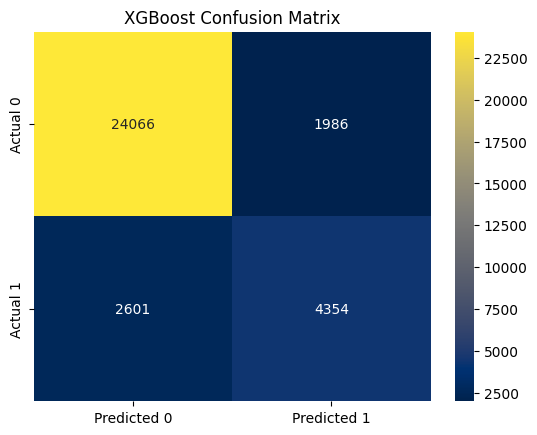

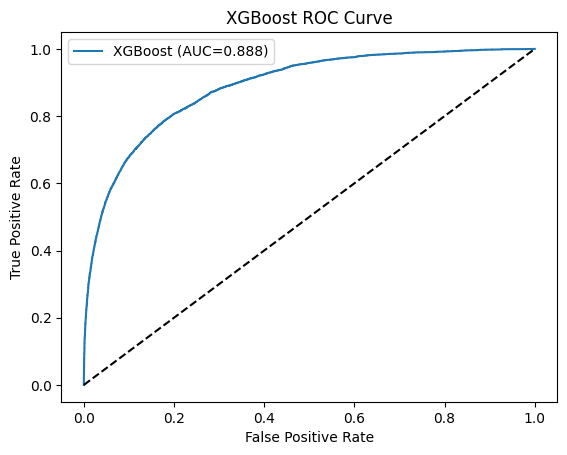

In [111]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
tn, fp, fn, tp = cm.ravel()
results_cmdf.append(['XGBClassifier-Hyper', tn, fp, fn, tp])
plt.title("XGBoost Confusion Matrix")
plt.show()



fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'XGBoost (AUC={auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()

# Over All business Impact and justification



In [ ]:
#Few Assumptions & Business deciosn are made to see the Revenue Impact with any of the models
#Revenue per customer - $100 -- Revenue
#Marketing Expense ( Retention Cost) -$5 -- Cost
#Percentage of Customer will Stay based on the Marketing - (5%) --- Percentage

In [ ]:
#Formula
#TP = Gain () Percent × Rev − Cost = (.5*100)-10
#TN = No Impact
#FP = Loss () we thought they will stay and spend marketing cost ( -5 per customer )
#FN = Loss () Revenue gone = (-100 per customer)

In [122]:
def calculate_business_impact(tp, fp, tn, fn, RP):
    revenue_per_customer = 100
    marketing_expense_per_customer = 5
    retention_percentage = RP
    profit = tp * ((revenue_per_customer * retention_percentage) - marketing_expense_per_customer) - (fp * marketing_expense_per_customer) - (fn * revenue_per_customer)
    return profit

rev_impact = []

model_results = {
    "Logistic Regression": {"tp": 2700, "fp": 1178, "tn": 24874, "fn": 4255},
    "Random Forest": {"tp": 2660, "fp": 650, "tn": 25402, "fn": 4295},
    "Gradient Boosting": {"tp": 3797, "fp": 1256, "tn": 24796, "fn": 3328},
    "XGBoost": {"tp": 3922, "fp": 1322, "tn": 24730, "fn": 3033},
    "XGBoost-hyperparameter": {"tp": 4354, "fp": 1986, "tn": 24066, "fn": 2601}
}


for model, vals in model_results.items():
    res = calculate_business_impact(vals["tp"], vals["fp"], vals["tn"], vals["fn"],0.5)
    rev_impact.append([model, 0.5, res])

rev_df = pd.DataFrame(rev_impact, columns=["Model", "Rentention%", "Profit-Margin"])
print(rev_df)

                    Model  Rentention%  Profit-Margin
0     Logistic Regression          0.5      -309890.0
1           Random Forest          0.5      -313050.0
2       Gradient Boosting          0.5      -168215.0
3                 XGBoost          0.5      -133420.0
4  XGBoost-hyperparameter          0.5       -74100.0


In [162]:
rev_df

,Model,Rentention%,Profit-Margin
0,Logistic Regression,0.5,-309890.0
1,Random Forest,0.5,-313050.0
2,Gradient Boosting,0.5,-168215.0
3,XGBoost,0.5,-133420.0
4,XGBoost-hyperparameter,0.5,-74100.0


In [123]:
metrics_cmdf = pd.DataFrame(results_cmdf, columns=["Model", "TN", "FP", "FN", "TP"])
revenue_per_customer = 100
marketing_expense_per_customer = 5
retention_percentage = 0.5
metrics_cmdf['Profit-Margin'] = metrics_cmdf['TP'] * ((revenue_per_customer * retention_percentage) - marketing_expense_per_customer) - (metrics_cmdf['FP'] * marketing_expense_per_customer) - (metrics_cmdf['FN'] * revenue_per_customer)
metrics_cmdf.sort_values(by='Profit-Margin', ascending=False, inplace=True)
#metrics_cmdf
print(metrics_cmdf)

                        Model     TN    FP    FN    TP  Profit-Margin
11        XGBClassifier-Hyper  24066  1986  2601  4354       -74100.0
9     Gradient Boosting-Hyper  24694  1358  3024  3931      -132295.0
6               XGBClassifier  24730  1322  3033  3922      -133420.0
4           Gradient Boosting  24796  1256  3158  3797      -151215.0
1                         KNN  24245  1807  3226  3729      -163830.0
8         Random Forest-Hyper  24934  1118  3314  3641      -173145.0
5                    AdaBoost  24776  1276  3316  3639      -174225.0
2               Decision Tree  24697  1355  3328  3627      -176360.0
10             AdaBoost-Hyper  24811  1241  3334  3621      -176660.0
0         Logistic Regression  24874  1178  4255  2700      -309890.0
7   Logistic Regression-Hyper  24874  1178  4255  2700      -309890.0
3               Random Forest  25402   650  4295  2660      -313050.0


##### Questions